In [27]:
import pandas as pd

qdf = pd.read_csv('data/question_data.csv', sep=';', index_col=0)

In [3]:
df = pd.read_feather("data.feather")
print(df.shape)

(68371, 2625)


In [4]:
# ... existing code ...

# Calculate percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Calculate total number of missing values
total_missing = df.isnull().sum().sum()

# Calculate percentage of missing values in entire dataset
total_missing_percentage = (total_missing / df.size) * 100

# Display statistics
print("Percentage of missing values per column:")
print(missing_percentage)
print("\nTotal number of missing values:", total_missing)
print("Total cells: ", df.shape[0]*df.shape[1])
print(f"\nPercentage of missing values in entire dataset: {total_missing_percentage:.2f}%")

Percentage of missing values per column:
q2             63.670270
q11            57.789121
q12            67.097161
q13            52.346755
q14            54.473388
                 ...    
gender          2.933992
race           18.936391
gender2         3.223589
gender2_num     3.223589
CA_items        0.000000
Length: 2625, dtype: float64

Total number of missing values: 137897961
Total cells:  179473875

Percentage of missing values in entire dataset: 76.83%


<Axes: >

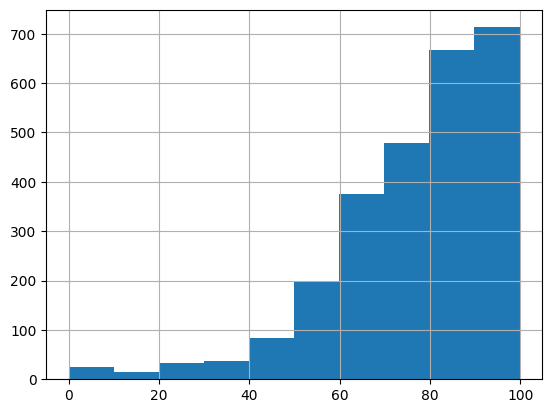

In [5]:
missing_percentage.hist()

In [6]:
# Select columns where the percentage of missing values is greater than 60%
full_cols = missing_percentage[missing_percentage < 60].index

# Display these columns
subset = df[full_cols]

subset = subset.replace('nan', pd.NA)  # Convert string 'nan' to actual NaN

# One-hot encoding with a "missing" category
encoded_df = pd.get_dummies(subset, dummy_na=True, prefix_sep='_')
print(encoded_df.head())

   p_pure  d_age  p_sexdrive  lf_max_age  p_oldfash  p_sprit  lf_min_age  \
0     NaN   25.0         NaN        36.0       16.0      NaN        25.0   
1     NaN   20.0         NaN        26.0        NaN      NaN        18.0   
2     NaN   22.0       -35.0        40.0       73.0     40.0        26.0   
3     NaN   29.0         NaN        38.0      -34.0    -22.0        28.0   
4    -3.0   30.0         NaN        46.0      -56.0    -18.0        22.0   

         CA  gender2_num  CA_items  ...  race_Black  race_Other  race_Indian  \
0  0.763080          0.0       4.0  ...       False       False        False   
1       NaN          1.0       0.0  ...       False       False        False   
2  0.661309          0.0       7.0  ...       False       False        False   
3       NaN          0.0       0.0  ...       False       False        False   
4  0.875424          0.0       3.0  ...       False       False        False   

   race_Middle Eastern  race_Native American  race_Pacific Isl

In [7]:
import pandas as pd

# Define a function to fill missing values
def fill_values(column):
    if column.dtype.name == 'category' or isinstance(column.dtype, pd.CategoricalDtype) or column.dtype == object:
        # Fill categorical columns with the mode
        return column.fillna(column.mode()[0])
    else:
        # Fill numerical columns with the mean
        return column.fillna(column.mean())

# Apply the function to the DataFrame
filled_df = subset.apply(fill_values)

print(filled_df)

             q11 q13 q14 q17 q28           q29 q30  \
0      Horrified  No  No  No  No  do the tying  No   
1      Horrified  No  No  No  No  do the tying  No   
2      Horrified  No  No  No  No  do the tying  No   
3      Horrified  No  No  No  No  do the tying  No   
4      Horrified  No  No  No  No  do the tying  No   
...          ...  ..  ..  ..  ..           ...  ..   
68366  Horrified  No  No  No  No  do the tying  No   
68367  Horrified  No  No  No  No  do the tying  No   
68368  Horrified  No  No  No  No  do the tying  No   
68369  Horrified  No  No  No  No  do the tying  No   
68370  Horrified  No  No  No  No  do the tying  No   

                                 q32   q35                   q41  ...  \
0      I have little or no interest.  Love  Not at all important  ...   
1      I have little or no interest.  Love  Not at all important  ...   
2      I have little or no interest.  Love   Extremely important  ...   
3      I have little or no interest.  Love  Not at all impo

In [8]:

# One-hot encoding with a "missing" category
encoded_filled_df = pd.get_dummies(filled_df, dummy_na=False, prefix_sep='_')
print(encoded_filled_df.head())

      p_pure  d_age  p_sexdrive  lf_max_age  p_oldfash   p_sprit  lf_min_age  \
0 -13.315334   25.0   14.957395        36.0    16.0000   1.13028        25.0   
1 -13.315334   20.0   14.957395        26.0     2.9583   1.13028        18.0   
2 -13.315334   22.0  -35.000000        40.0    73.0000  40.00000        26.0   
3 -13.315334   29.0   14.957395        38.0   -34.0000 -22.00000        28.0   
4  -3.000000   30.0   14.957395        46.0   -56.0000 -18.00000        22.0   

             CA  gender2_num  CA_items  ...  race_Asian  \
0  7.630798e-01          0.0       4.0  ...       False   
1  6.026017e-18          1.0       0.0  ...       False   
2  6.613091e-01          0.0       7.0  ...       False   
3  6.026017e-18          0.0       0.0  ...       False   
4  8.754240e-01          0.0       3.0  ...       False   

   race_Hispanic / Latin  race_Black  race_Other  race_Indian  \
0                  False       False       False        False   
1                  False       Fal

In [9]:
[s for s in encoded_filled_df.columns.to_list() if s.startswith('race')]

['race_White',
 'race_Mixed',
 'race_Asian',
 'race_Hispanic / Latin',
 'race_Black',
 'race_Other',
 'race_Indian',
 'race_Middle Eastern',
 'race_Native American',
 'race_Pacific Islander']

## read in the PCA data

In [10]:
pca_data = pd.read_parquet('pca2_simple_fill.parquet')

In [11]:
pca_data.columns

Index(['PC1', 'PC2'], dtype='object')

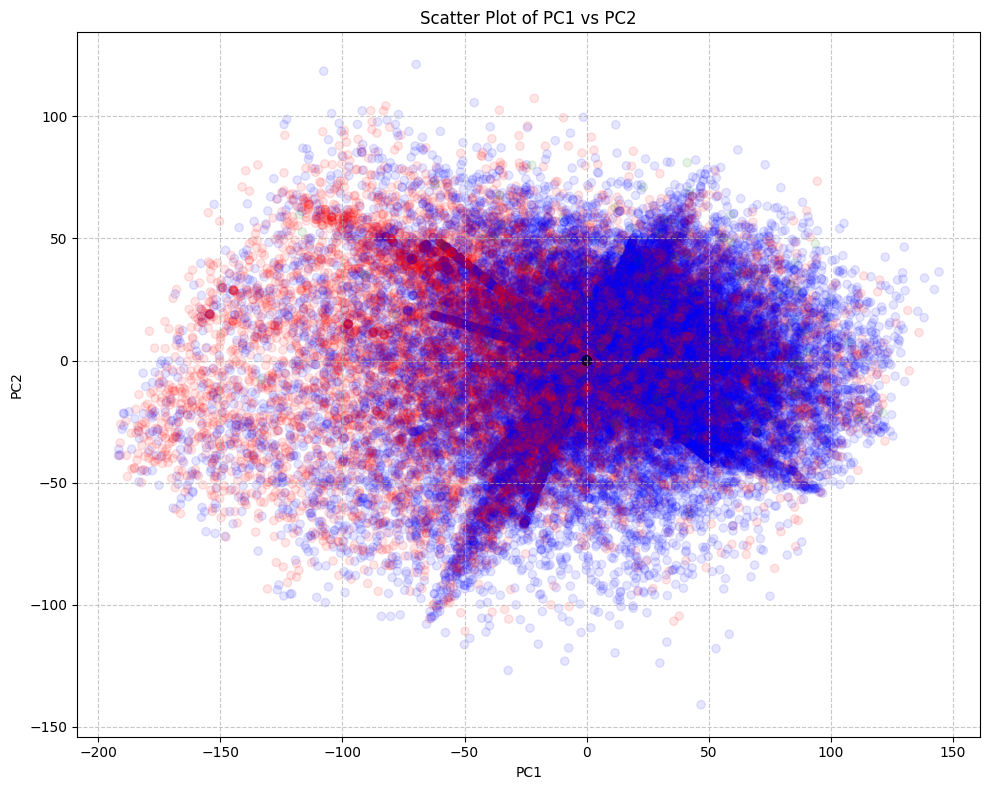

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_data['PC1'], pca_data['PC2'], alpha=0.1, c=df['gender'].map({'Man': 'blue', 'Woman': 'red', 'Other': 'green', None: 'black'}).to_list())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True, linestyle='--', alpha=0.7)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
df['gender'].value_counts(dropna=False)

gender
Man      40215
Woman    25952
None      2006
Other      198
Name: count, dtype: int64

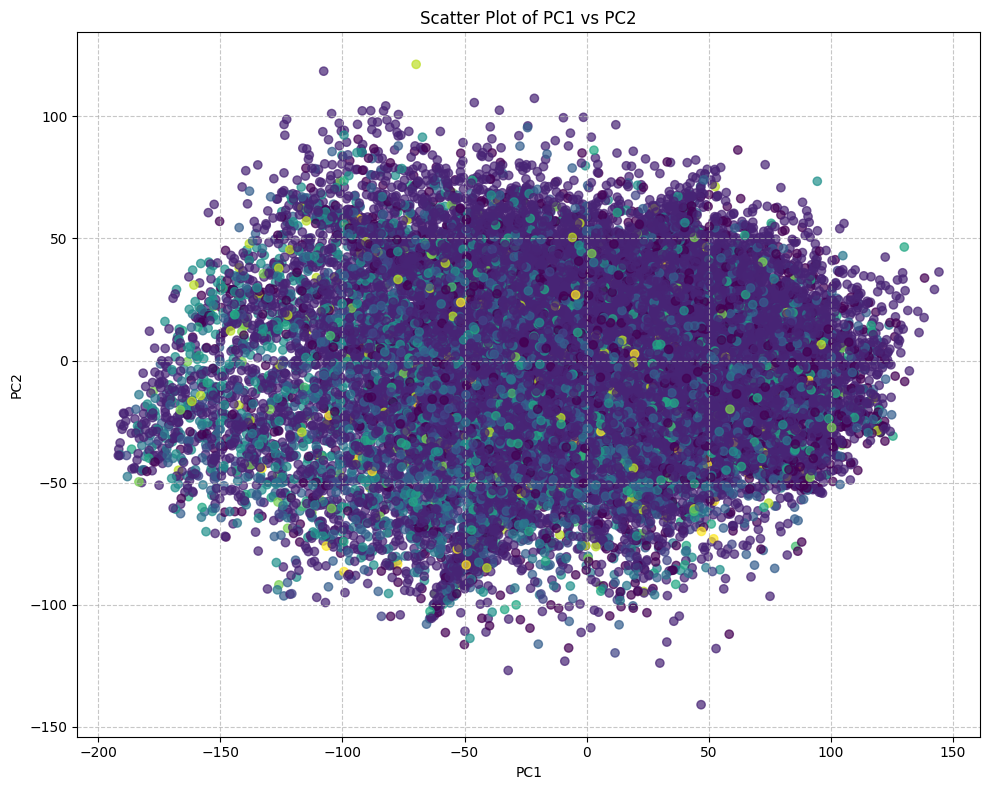

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

races, _ = pd.factorize(df['race'])

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_data['PC1'], pca_data['PC2'], alpha=0.7, c=races)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True, linestyle='--', alpha=0.7)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
pd.factorize(df['race'])


(array([ 0, -1, -1, ..., -1,  0,  5]),
 CategoricalIndex(['White', 'Hispanic / Latin', 'Mixed', 'Black', 'Asian',
                   'Other', 'Native American', 'Middle Eastern', 'Indian',
                   'Pacific Islander'],
                  categories=['White', 'Mixed', 'Asian', 'Hispanic / Latin', ..., 'Indian', 'Middle Eastern', 'Native American', 'Pacific Islander'], ordered=False, dtype='category'))

In [16]:
import pandas as pd
import re

def get_non_q_columns(df):
    # Define the regex pattern
    pattern = r'^q\d+$'
    
    # Filter columns that don't match the pattern
    non_q_columns = [col for col in df.columns if not re.match(pattern, col)]
    
    return non_q_columns

metadata = df[get_non_q_columns(df)]

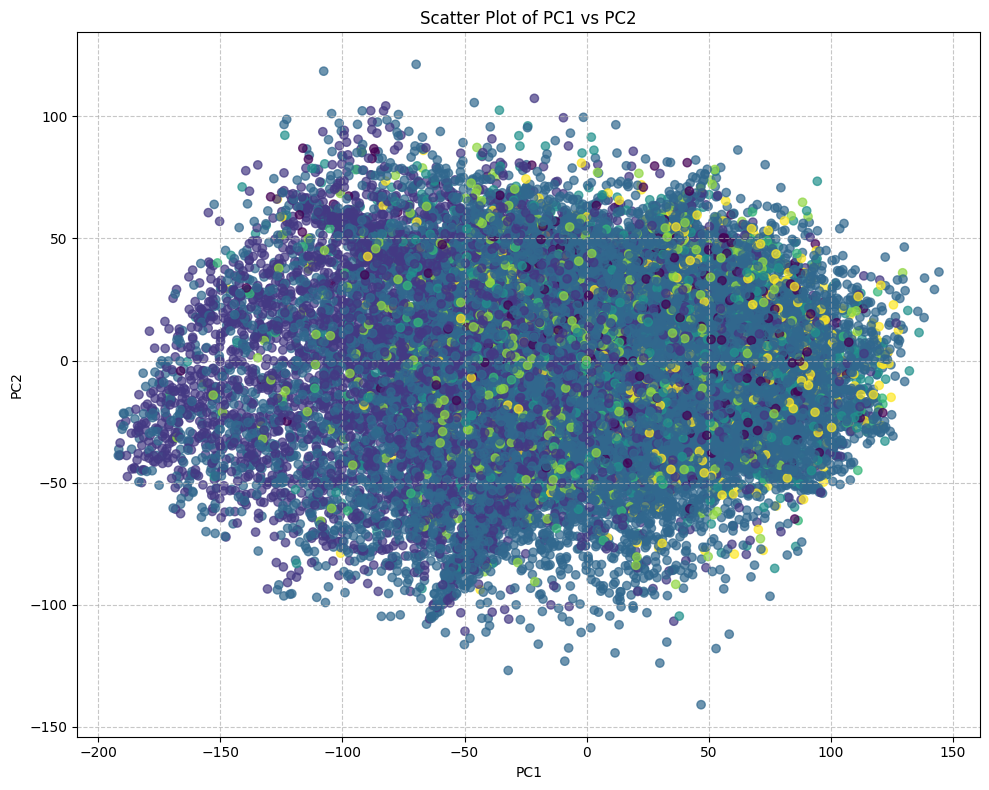

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

g_o, _ = pd.factorize(df['gender_orientation'])

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_data['PC1'], pca_data['PC2'], alpha=0.7, c=g_o)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True, linestyle='--', alpha=0.7)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
missing_percentage.sort_values()

CA_items     0.000000
q20062       0.000000
q34113       0.000000
q416235      0.000000
q64664       0.000000
              ...    
q145537     99.783534
q125283     99.815711
q155299     99.824487
q72000      99.825950
q92899      99.852277
Length: 2625, dtype: float64

In [37]:
import pandas as pd
from IPython.display import display

def full_print(series):
    with pd.option_context('display.max_rows', None,
                        'display.max_columns', None,
                        'display.width', None,
                        'display.max_colwidth', None):
        display(series)

In [42]:
for question in missing_percentage.sort_values().index[:10]:
    try:
        full_print(qdf.loc[question])
    except:
        pass
    print(df[question].value_counts())

CA_items
0.0     13948
2.0      7294
1.0      7175
3.0      7059
4.0      6591
5.0      5643
6.0      4823
7.0      4506
8.0      3950
9.0      2950
10.0     2040
11.0     1335
12.0      659
13.0      303
14.0       95
Name: count, dtype: int64


text        While in the middle of the best lovemaking of your life, if your lover asked you to squeal like a dolphin, would you?
option_1                                                                                                              Absolutely.
option_2                                                                                                                  No way.
option_3                                                                                                      The best?  Maybe...
option_4                                                                                                                      NaN
N                                                                                                                           23496
Type                                                                                                                            O
Order                                                                                     

q20062
The best?  Maybe...    57236
Absolutely.             6428
No way.                 4707
Name: count, dtype: int64


text        How do you feel about government-subsidized food programs (free lunch, food stamps, etc.)?
option_1                                                                                    No problem
option_2                                                                It's okay, if it is not abused
option_3                                                                Okay for short amounts of time
option_4                                                                             Never - Get a job
N                                                                                                31769
Type                                                                                                 O
Order                                                                                              NaN
Keywords                                                                                      politics
Name: q34113, dtype: object

q34113
Never - Get a job                 37271
It's okay, if it is not abused    18029
No problem                         9395
Okay for short amounts of time     3676
Name: count, dtype: int64


text        Do you like watching foreign movies with subtitles?
option_1                                                    Yes
option_2                                                     No
option_3                        Can't answer without a subtitle
option_4                                                    NaN
N                                                         20364
Type                                                          O
Order                                                   3, 1, 2
Keywords                                            descriptive
Name: q416235, dtype: object

q416235
Can't answer without a subtitle    49364
Yes                                15496
No                                  3511
Name: count, dtype: int64


text        Do you think it is okay to open old graves to get more knowledge of ancient cultures and their history?
option_1                                                                                                       Yes.
option_2                                                                                                        No.
option_3                                                                                       I don't really care.
option_4                                                                                                        NaN
N                                                                                                              1148
Type                                                                                                              O
Order                                                                                                       2, 3, 1
Keywords                                                                

q64664
I don't really care.    67395
Yes.                      830
No.                       146
Name: count, dtype: int64


text        Which type of wine would you prefer to drink outside of a meal, such as for leisure?
option_1                                                   White (such as Chardonnay, Riesling).
option_2                                                 Red (such as Merlot, Cabernet, Shiraz).
option_3                                                         Rosé (such as White Zinfindel).
option_4                                                                     I don't drink wine.
N                                                                                          18838
Type                                                                                           N
Order                                                                                        NaN
Keywords                                                                             descriptive
Name: q85419, dtype: object

q85419
Rosé (such as White Zinfindel).            51170
Red (such as Merlot, Cabernet, Shiraz).     7888
I don't drink wine.                         5027
White (such as Chardonnay, Riesling).       4286
Name: count, dtype: int64


text        Min age of match
option_1                 NaN
option_2                 NaN
option_3                 NaN
option_4                 NaN
N                      66365
Type                     NaN
Order                    NaN
Keywords                 NaN
Name: lf_min_age, dtype: object

lf_min_age
18.0    10928
25.0     7578
21.0     5663
20.0     5526
30.0     4704
24.0     4553
28.0     3854
22.0     3823
23.0     3754
19.0     3587
27.0     3195
26.0     3122
29.0     1810
32.0     1319
33.0      953
34.0      947
31.0      697
35.0      133
38.0       46
40.0       45
36.0       31
37.0       26
39.0       14
45.0       11
42.0        9
50.0        7
48.0        7
49.0        4
44.0        4
55.0        4
43.0        2
47.0        2
46.0        2
60.0        2
53.0        1
58.0        1
41.0        1
Name: count, dtype: int64


text        Status of match
option_1                NaN
option_2                NaN
option_3                NaN
option_4                NaN
N                     66365
Type                    NaN
Order                   NaN
Keywords                NaN
Name: lf_single, dtype: object

lf_single
Who are single    66365
Name: count, dtype: int64


text          Age
option_1      NaN
option_2      NaN
option_3      NaN
option_4      NaN
N           66365
Type          NaN
Order         NaN
Keywords      NaN
Name: d_age, dtype: object

d_age
27.0    3861
29.0    3793
26.0    3742
30.0    3688
28.0    3621
        ... 
86.0       1
77.0       1
90.0       1
84.0       1
76.0       1
Name: count, Length: 71, dtype: int64


text        Type of match
option_1              NaN
option_2              NaN
option_3              NaN
option_4              NaN
N                   66365
Type                  NaN
Order                 NaN
Keywords              NaN
Name: lf_want, dtype: object

lf_want
Women                    37011
Men                      17534
Everyone                  5130
Men who like women        4465
Women who like men         632
Straight men only          559
All who like bi women      445
Everybody                  440
Men who like men            48
Women who like women        32
Straight women only         32
All who like bi men         14
Gay men only                 9
Bi women only                8
Gay women only               5
Bi men and women             1
Name: count, dtype: int64


In [43]:
[col for col in df.columns if 'pol' in col]

['p_polit']

In [56]:
qdf['missing'] = qdf.index.map(missing_percentage)

In [61]:
qdf[qdf['Keywords'].str.contains('pol').fillna(False)].sort_values(by='missing', )

/var/folders/9d/j5yw54ld78qdvpkxky67ldz40000gn/T/ipykernel_43537/1237164082.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  qdf[qdf['Keywords'].str.contains('pol').fillna(False)].sort_values(by='missing', )


,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords,missing
q34113,How do you feel about government-subsidized fo...,No problem,"It's okay, if it is not abused",Okay for short amounts of time,Never - Get a job,31769,O,NaN,politics,0.000000
q179268,Are you either vegetarian or vegan?,Yes,No,NaN,NaN,54202,O,NaN,politics; descriptive,20.723699
q403,Do you enjoy discussing politics?,Yes,No,NaN,NaN,52369,O,NaN,politics; preference; descriptive,23.404660
q175,Should burning your country's flag be illegal?,Yes,No,NaN,NaN,45720,O,NaN,politics,33.129543
q212813,Which best describes your political beliefs?,Liberal / Left-wing,Centrist,Conservative / Right-wing,Other,45107,M,[4],politics; descriptive,34.026122
...,...,...,...,...,...,...,...,...,...,...
q41683,Would you consider donating your body to scien...,Yes.,No.,NaN,NaN,1512,O,NaN,politics; opinion; preference,97.788536
q42733,The following quote has been attributed to the...,Yes.,No.,NaN,NaN,1506,O,NaN,politics; opinion,97.797312
q16088,Can intelligence be quantified or measured?,Yes,No,Only Some Parts,I'm Not Sure,1303,O,"2, (3, 4), 1",politics; cognitive,98.094221
q140080,Is abortion okay if a woman is raped?,Yes,No,I can't decide,NaN,306,O,"2, 3, 1",politics; religion/superstition,99.552442


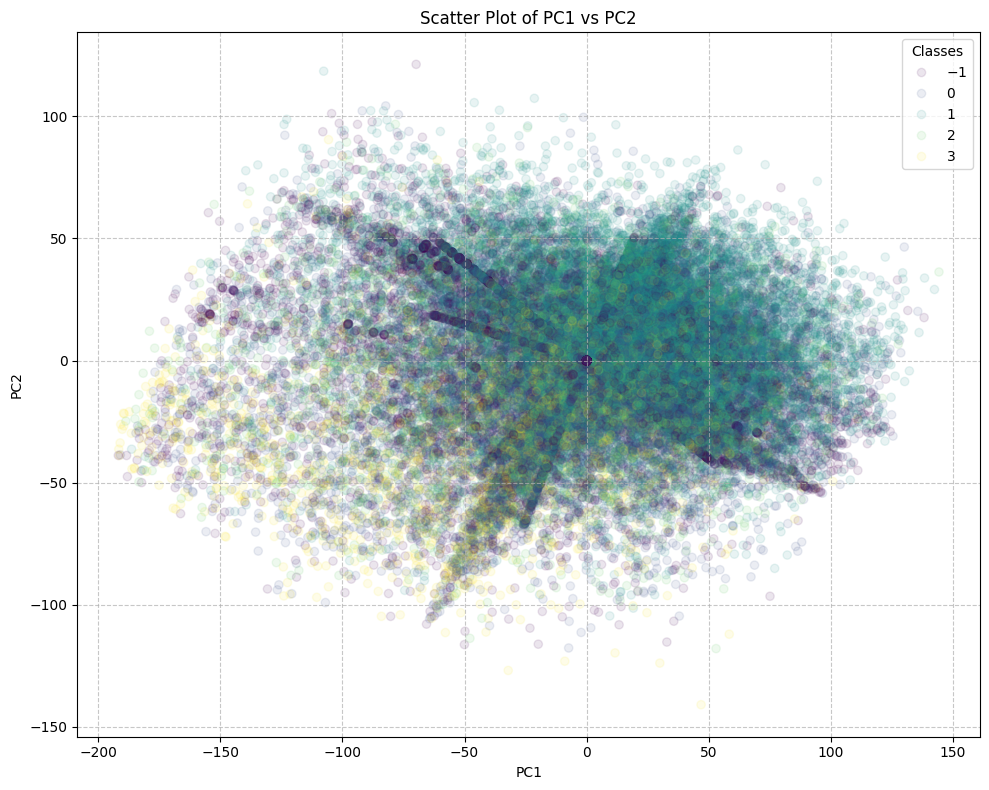

In [73]:
pol, labels = pd.factorize(df['q212813'])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], alpha=0.1, c=pol, cmap='viridis')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.tight_layout()
plt.show()

In [69]:
labels.tolist()

['Other', 'Liberal / Left-wing', 'Centrist', 'Conservative / Right-wing']